In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score, confusion_matrix,
    mean_squared_error, mean_absolute_error, r2_score
)

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [2]:
# Load the prepared dataset
input_file_path = r"C:\Users\mbaki\Desktop\Proje\data\processed\final_prepared_data_with_features.csv"
df = pd.read_csv(input_file_path)

# Remove 'Home Goals' and 'Away Goals' columns
df.drop(['Home Goals', 'Away Goals'], axis=1, inplace=True)

# Recode 'Match_Result'
# -1 -> 0 (Loss), 0 -> 1 (Draw), 1 -> 2 (Win)
df['Match_Result'] = df['Match_Result'].map({-1: 0, 0: 1, 1: 2})

# Separate features and target variables
X = df.drop(['Match_Result', 'Goal_Difference'], axis=1)
y_result = df['Match_Result']
y_goals = df['Goal_Difference']

# Display the DataFrame (optional)
# print(df)


In [3]:
# Split the data into training and testing sets for match result prediction
X_train_result, X_test_result, y_train_result, y_test_result = train_test_split(
    X, y_result, test_size=0.2, random_state=42, stratify=y_result
)

# Split the data into training and testing sets for goal difference prediction
X_train_goals, X_test_goals, y_train_goals, y_test_goals = train_test_split(
    X, y_goals, test_size=0.2, random_state=42
)


In [4]:
# Define the scaler
scaler = StandardScaler()

# Scale features for match result prediction
X_train_result = scaler.fit_transform(X_train_result)
X_test_result = scaler.transform(X_test_result)

# Scale features for goal difference prediction
X_train_goals = scaler.fit_transform(X_train_goals)
X_test_goals = scaler.transform(X_test_goals)


In [5]:
# Define classification models
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


In [6]:
# Define regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}


In [7]:
# Evaluate classification models
classification_results = []

print("=== Classification Models Performance Evaluation ===\n")

for model_name, model in classification_models.items():
    # Train the model
    model.fit(X_train_result, y_train_result)
    
    # Make predictions
    y_pred = model.predict(X_test_result)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test_result, y_pred)
    f1 = f1_score(y_test_result, y_pred, average='weighted')
    
    # Store the results
    classification_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1
    })
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}\n")


=== Classification Models Performance Evaluation ===

Model: Logistic Regression
Accuracy: 0.6579
F1 Score: 0.6345

Model: Decision Tree
Accuracy: 0.5658
F1 Score: 0.5602

Model: Random Forest
Accuracy: 0.6842
F1 Score: 0.6830

Model: Support Vector Machine
Accuracy: 0.6447
F1 Score: 0.6297



C:\Users\mbaki\Desktop\Proje\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:57:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.6447
F1 Score: 0.6407



In [8]:
# Evaluate regression models
regression_results = []

print("=== Regression Models Performance Evaluation ===\n")

for model_name, model in regression_models.items():
    # Train the model
    model.fit(X_train_goals, y_train_goals)
    
    # Make predictions
    y_pred = model.predict(X_test_goals)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test_goals, y_pred)
    mae = mean_absolute_error(y_test_goals, y_pred)
    r2 = r2_score(y_test_goals, y_pred)
    
    # Store the results
    regression_results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R² Score': r2
    })
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}\n")


=== Regression Models Performance Evaluation ===

Model: Linear Regression
Mean Squared Error (MSE): 0.2445
Mean Absolute Error (MAE): 0.3699
R² Score: 0.7701

Model: Decision Tree Regressor
Mean Squared Error (MSE): 0.4485
Mean Absolute Error (MAE): 0.5077
R² Score: 0.5782

Model: Random Forest Regressor
Mean Squared Error (MSE): 0.2660
Mean Absolute Error (MAE): 0.4211
R² Score: 0.7498

Model: XGBoost Regressor
Mean Squared Error (MSE): 0.3044
Mean Absolute Error (MAE): 0.4522
R² Score: 0.7137



In [9]:
# Convert classification results to a DataFrame
classification_df = pd.DataFrame(classification_results)
print("Classification Models Performance Table:")
print(classification_df)


Classification Models Performance Table:
                    Model  Accuracy  F1 Score
0     Logistic Regression  0.657895  0.634508
1           Decision Tree  0.565789  0.560152
2           Random Forest  0.684211  0.683008
3  Support Vector Machine  0.644737  0.629669
4                 XGBoost  0.644737  0.640731


In [10]:
# Convert regression results to a DataFrame
regression_df = pd.DataFrame(regression_results)
print("\nRegression Models Performance Table:")
print(regression_df)



Regression Models Performance Table:
                     Model       MSE       MAE  R² Score
0        Linear Regression  0.244491  0.369909  0.770057
1  Decision Tree Regressor  0.448479  0.507692  0.578208
2  Random Forest Regressor  0.265998  0.421090  0.749830
3        XGBoost Regressor  0.304390  0.452185  0.713723



Top 10 Important Features - XGBoost:
                     Feature  Importance
36          Performance_Diff    0.157322
28          Home_Midfielders    0.036320
4           Away Performance    0.032687
17             Away Player 2    0.029348
34  Away_Players_Total_Score    0.029056
52    Performance_Diff_Last5    0.025677
53   Performance_Diff_Last10    0.025579
19             Away Player 4    0.025213
20             Away Player 5    0.024675
7              Home Player 3    0.024427


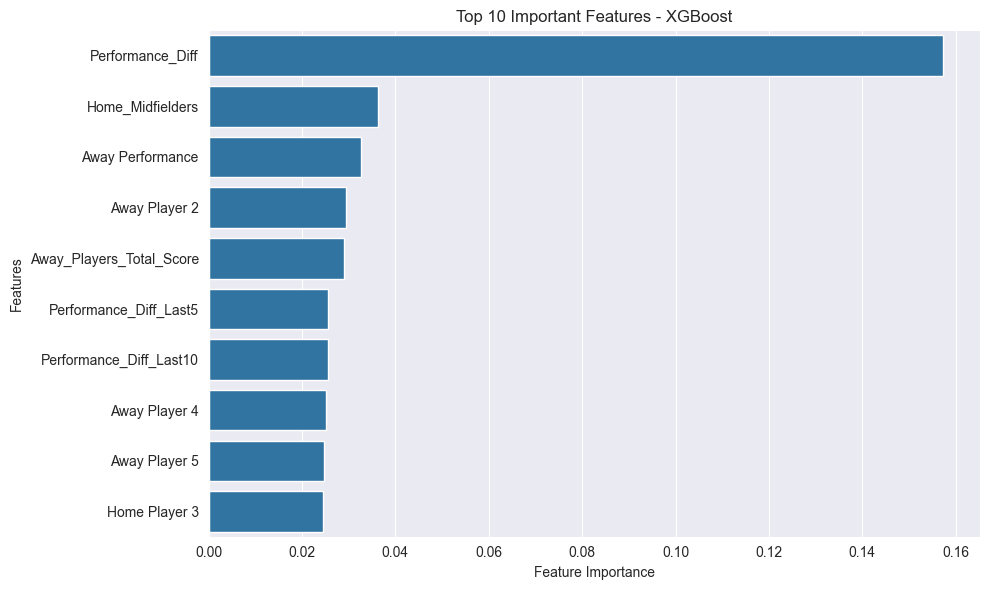

In [11]:
# Feature Importance for Classification

# Select the second best model (e.g., 'XGBoost')
# Update this based on your classification results
best_second_model_name = 'XGBoost'  
best_second_model = classification_models[best_second_model_name]

# Check if the model has feature_importances attribute
if hasattr(best_second_model, 'feature_importances_'):
    # Get feature importances
    feature_importances = best_second_model.feature_importances_
    
    # Get feature names
    feature_names = X.columns
    
    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    
    # Sort features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # Display top 10 important features
    print(f"\nTop 10 Important Features - {best_second_model_name}:")
    print(importance_df.head(10))
    
    # Plot the top 10 important features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
    plt.title(f'Top 10 Important Features - {best_second_model_name}')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print(f"The model {best_second_model_name} does not have feature_importances attribute.")


In [12]:
# Feature Importance for Regression

# Sort regression results by R² Score in descending order
sorted_regression_df = regression_df.sort_values(by='R² Score', ascending=False)
print("\nRegression Models Sorted by R² Score:")
print(sorted_regression_df)

# Identify the best regression model
best_regression_model_name = sorted_regression_df.iloc[0]['Model']
print(f"\nBest Regression Model: {best_regression_model_name}")

# Select the best regression model
best_reg = regression_models[best_regression_model_name]

# Check if the model has feature_importances attribute
if hasattr(best_reg, 'feature_importances_'):
    # Get feature importances
    feature_importances_reg = best_reg.feature_importances_
    
    # Get feature names
    feature_names = X.columns
    
    # Create a DataFrame for feature importances
    importance_df_reg = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances_reg
    })
    
    # Sort features by importance
    importance_df_reg = importance_df_reg.sort_values(by='Importance', ascending=False)
    
    # Display top 10 important features
    print("\nTop 10 Important Features (Regression):")
    print(importance_df_reg.head(10))
else:
    print(f"The model {best_regression_model_name} does not have feature_importances attribute.")



Regression Models Sorted by R² Score:
                     Model       MSE       MAE  R² Score
0        Linear Regression  0.244491  0.369909  0.770057
2  Random Forest Regressor  0.265998  0.421090  0.749830
3        XGBoost Regressor  0.304390  0.452185  0.713723
1  Decision Tree Regressor  0.448479  0.507692  0.578208

Best Regression Model: Linear Regression
The model Linear Regression does not have feature_importances attribute.
